# Example Code from Lecture 11

The following notebook contains examples of python code for model overfitting and applying other classification techniques beyond decision trees.

# Model Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'ro',X[int(N/2):,0],X[int(N/2):,1],'g+',ms=4)

### Create training and test sets

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

### Fitting decision trees of different depths

In [3]:
from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

Text(0,0.5,'Accuracy')

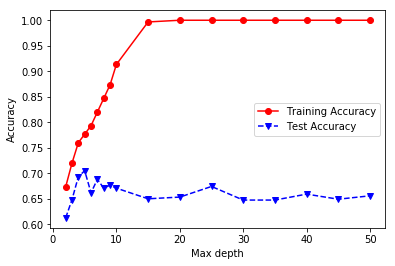

In [4]:
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### Model Selection with Decision Trees

Best hyperparameter, maxdepth = 5
Test Accuracy = 0.705


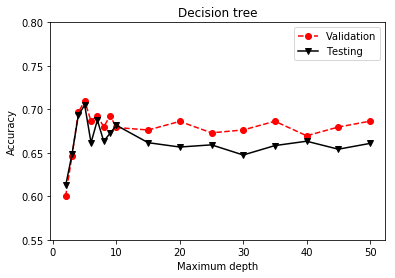

In [5]:
from sklearn.model_selection import cross_val_score

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

numFolds = 5
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X_train, Y_train, cv=numFolds)
    validationAcc[index] = np.mean(scores)
    
    clf = clf.fit(X_train, Y_train)
    Y_predTest = clf.predict(X_test)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.55,0.8])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

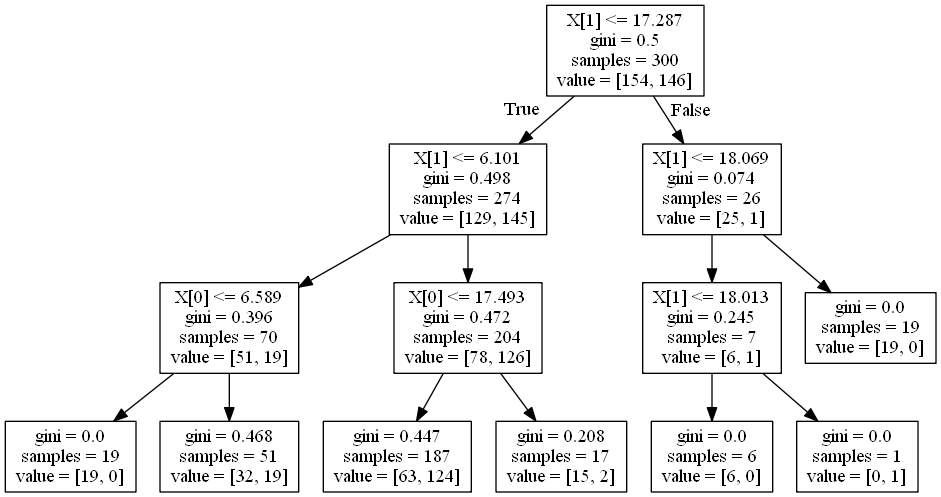

In [6]:
import pydotplus 
from IPython.display import Image

clf = tree.DecisionTreeClassifier(max_depth=bestHyperparam)
clf = clf.fit(X_train, Y_train)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

# Other Classification Techniques

In [7]:
import pandas as p

data = p.read_csv('diabetes.csv',header='infer')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [8]:
from sklearn.model_selection import train_test_split

Y = data['class']
X = data.drop('class',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

### Results for decision tree

In [9]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
tree_acc = accuracy_score(Y_test, Y_pred)
tree_acc

0.6764227642276422

### Results for nearest neighbor classifier

Text(0,0.5,'Test accuracy')

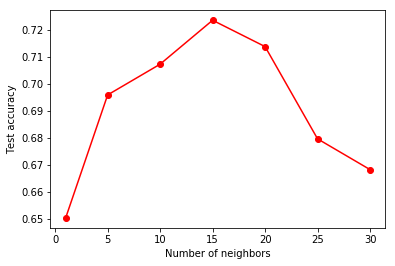

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
knn_acc = []

for nn in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=nn)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    knn_acc.append(accuracy_score(Y_test, Y_pred))
    
plt.plot(numNeighbors, knn_acc, 'ro-')
plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')

### Results for linear classifiers (logistic regression and SVM)

C:\Users\msi_pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.4, 0.8)

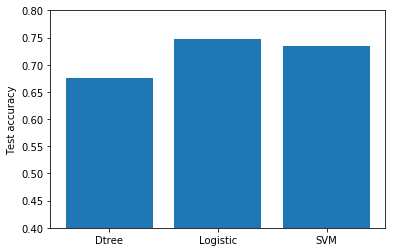

In [11]:
from sklearn import linear_model
from sklearn.svm import SVC

clf = linear_model.LogisticRegression(C=10)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
logistic_acc = accuracy_score(Y_test, Y_pred)

clf = SVC(C=10,kernel='linear')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
svm_acc = accuracy_score(Y_test, Y_pred)

methods = ['Dtree', 'Logistic', 'SVM']
acc = [tree_acc, logistic_acc, svm_acc]
plt.bar([1.5,2.5,3.5],acc)
plt.xticks([1.5,2.5,3.5], methods)
plt.ylabel('Test accuracy')
plt.ylim([0.4,0.8])

### Results for Artificial Neural Networks (1 hidden layer with 4 hidden neurons)

(0.4, 0.8)

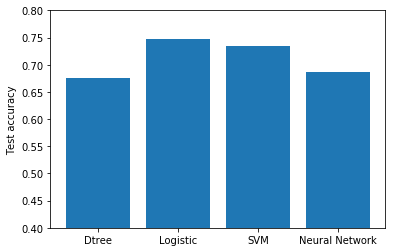

In [12]:
from sklearn import neural_network

clf = neural_network.MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', 
                                  max_iter=2000, random_state=1)
clf = clf.fit(X_train, Y_train.ravel())
Y_pred = clf.predict(X_test)
nn_acc = accuracy_score(Y_test, Y_pred)

methods = ['Dtree', 'Logistic', 'SVM', 'Neural Network']
acc = [tree_acc, logistic_acc, svm_acc, nn_acc]
plt.bar([1.5,2.5,3.5,4.5],acc)
plt.xticks([1.5,2.5,3.5,4.5], methods)
plt.ylabel('Test accuracy')
plt.ylim([0.4,0.8])

### Results for Ensemble Classifiers

([<matplotlib.axis.XTick at 0x1e7e6d0e2e8>,
 <a list of 4 Text xticklabel objects>)

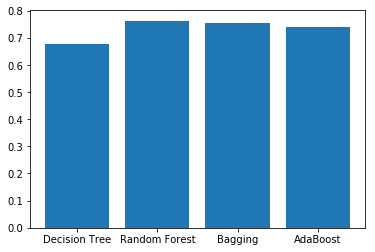

In [13]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numEstimators = 500
ensemble_acc = [tree_acc]

clf = ensemble.RandomForestClassifier(n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
ensemble_acc.append(accuracy_score(Y_test, Y_pred))

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
ensemble_acc.append(accuracy_score(Y_test, Y_pred))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=numEstimators)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
ensemble_acc.append(accuracy_score(Y_test, Y_pred))

methods = ['Decision Tree','Random Forest', 'Bagging', 'AdaBoost']
plt.bar([1.5,2.5,3.5,4.5], ensemble_acc)
plt.xticks([1.5,2.5,3.5,4.5], methods)